In [1]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing(as_frame=True, return_X_y=True)
df, target = data[0], data[1] 

In [4]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


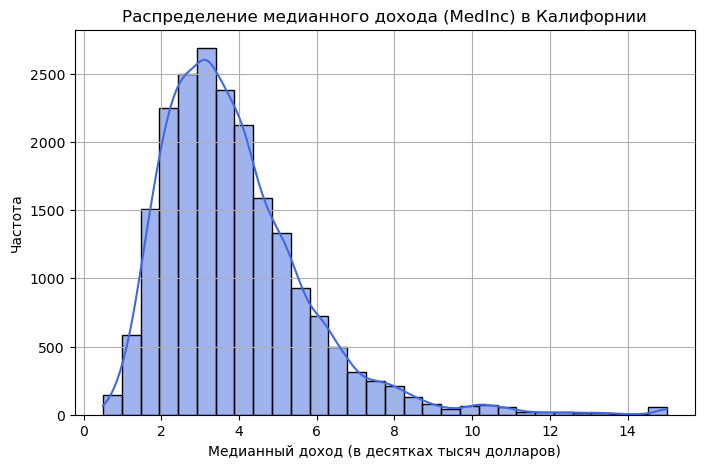

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Строим гистограмму
plt.figure(figsize=(8, 5))
sns.histplot(df["MedInc"], bins=30, kde=True, color="royalblue")

# Оформляем график
plt.xlabel("Медианный доход (в десятках тысяч долларов)")
plt.ylabel("Частота")
plt.title("Распределение медианного дохода (MedInc) в Калифорнии")
plt.grid(True)
plt.show()

In [12]:
import numpy as np

print(f'Медиана {np.median(df["MedInc"])}')
print(f'Среднее {np.mean(df["MedInc"])}')

Медиана 3.5347999999999997
Среднее 3.8706710029069766


In [16]:
np.median(df["MedInc"]) - np.mean(df["MedInc"])

-0.3358710029069769

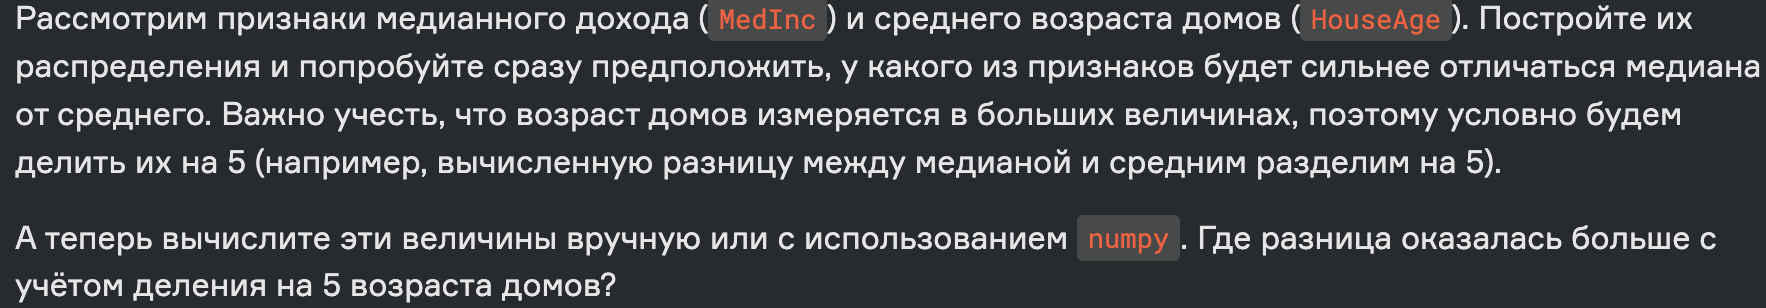

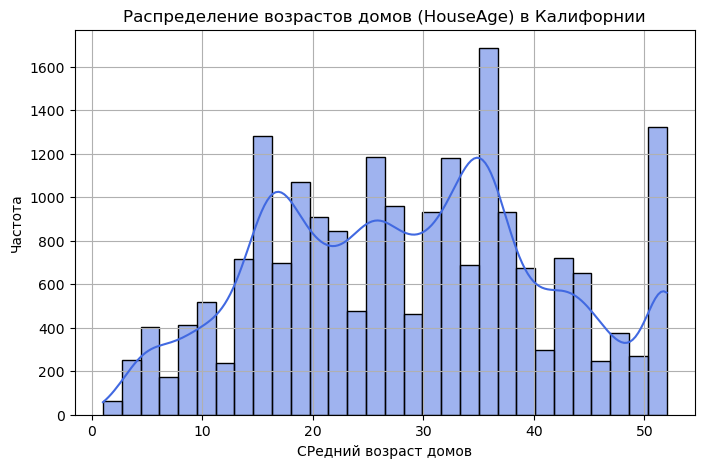

In [13]:
# Строим гистограмму
plt.figure(figsize=(8, 5))
sns.histplot(df["HouseAge"], bins=30, kde=True, color="royalblue")

# Оформляем график
plt.xlabel("СРедний возраст домов")
plt.ylabel("Частота")
plt.title("Распределение возрастов домов (HouseAge) в Калифорнии")
plt.grid(True)
plt.show()

In [14]:
print(f'Медиана {np.median(df["HouseAge"])}')
print(f'Среднее {np.mean(df["HouseAge"])}')

Медиана 29.0
Среднее 28.639486434108527


In [18]:
(np.median(df["HouseAge"]) - np.mean(df["HouseAge"]))/5

0.07210271317829467

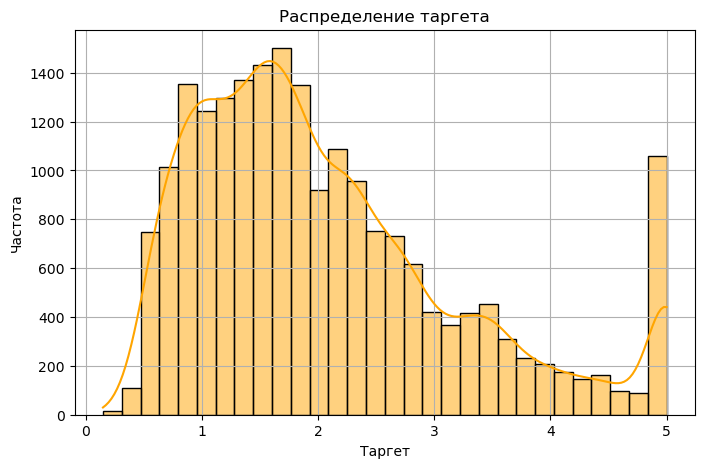

In [19]:
# Строим гистограмму
plt.figure(figsize=(8, 5))
sns.histplot(target, bins=30, kde=True, color="orange")

# Оформляем график
plt.xlabel("Таргет")
plt.ylabel("Частота")
plt.title("Распределение таргета")
plt.grid(True)
plt.show()

In [21]:
from scipy.stats import iqr

iqr_scipy = iqr(target) # интерквартильный размах этой случайной величины
print(iqr_scipy)

1.4512499999999997


In [22]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [31]:

df_corr = df.copy()
df_corr['Target'] = target

corr_matrix = df_corr.corr(method="pearson")
print('Корреляция Пирсона до нормализации')
print(corr_matrix["Target"].sort_values(ascending=False))

print('\n')
corr_matrix = df_corr.corr(method="spearman")
print('Корреляция Спирмена до нормализации')
print(corr_matrix["Target"].sort_values(ascending=False))

print('\n')
corr_matrix = df_corr.corr(method="kendall")
print('Корреляция Кендалла до нормализации')
print(corr_matrix["Target"].sort_values(ascending=False))

Корреляция Пирсона до нормализации
MedHouseVal    1.000000
Target         1.000000
MedInc         0.688075
AveRooms       0.151948
HouseAge       0.105623
AveOccup      -0.023737
Population    -0.024650
Longitude     -0.045967
AveBedrms     -0.046701
Latitude      -0.144160
Name: Target, dtype: float64


Корреляция Спирмена до нормализации
MedHouseVal    1.000000
Target         1.000000
MedInc         0.676778
AveRooms       0.263367
HouseAge       0.074855
Population     0.003839
Longitude     -0.069667
AveBedrms     -0.125187
Latitude      -0.165739
AveOccup      -0.256594
Name: Target, dtype: float64


Корреляция Кендалла до нормализации
MedHouseVal    1.000000
Target         1.000000
MedInc         0.495528
AveRooms       0.179175
HouseAge       0.049822
Population     0.002172
Longitude     -0.052495
AveBedrms     -0.083489
Latitude      -0.109411
AveOccup      -0.174370
Name: Target, dtype: float64


In [33]:
from scipy.stats import zscore

df_corr2 = df.copy()
df_corr2['Target'] = target

df_corr_stand = df_corr2.apply(zscore)

corr_matrix = df_corr_stand.corr(method="pearson")
print('Корреляция Пирсона после нормализации')
print(corr_matrix["Target"].sort_values(ascending=False))

print('\n')
corr_matrix = df_corr_stand.corr(method="spearman")
print('Корреляция Спирмена после нормализации')
print(corr_matrix["Target"].sort_values(ascending=False))

print('\n')
corr_matrix = df_corr_stand.corr(method="kendall")
print('Корреляция Кендалла после нормализации')
print(corr_matrix["Target"].sort_values(ascending=False))

Корреляция Пирсона после нормализации
MedHouseVal    1.000000
Target         1.000000
MedInc         0.688075
AveRooms       0.151948
HouseAge       0.105623
AveOccup      -0.023737
Population    -0.024650
Longitude     -0.045967
AveBedrms     -0.046701
Latitude      -0.144160
Name: Target, dtype: float64


Корреляция Спирмена после нормализации
MedHouseVal    1.000000
Target         1.000000
MedInc         0.676778
AveRooms       0.263367
HouseAge       0.074855
Population     0.003839
Longitude     -0.069667
AveBedrms     -0.125187
Latitude      -0.165739
AveOccup      -0.256594
Name: Target, dtype: float64


Корреляция Кендалла после нормализации
MedHouseVal    1.000000
Target         1.000000
MedInc         0.495528
AveRooms       0.179175
HouseAge       0.049822
Population     0.002172
Longitude     -0.052495
AveBedrms     -0.083489
Latitude      -0.109411
AveOccup      -0.174370
Name: Target, dtype: float64


In [35]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [39]:


df_corr = df[['AveRooms']].copy()
df_corr['Target'] = target

corr_matrix = df_corr.corr(method="pearson")
print('Корреляция Пирсона')
print(corr_matrix["Target"].sort_values(ascending=False))

print('\n')
corr_matrix = df_corr.corr(method="spearman")
print('Корреляция Спирмена')
print(corr_matrix["Target"].sort_values(ascending=False))

print('\n')
corr_matrix = df_corr.corr(method="kendall")
print('Корреляция Кендалла')
print(corr_matrix["Target"].sort_values(ascending=False))

Корреляция Пирсона
Target      1.000000
AveRooms    0.151948
Name: Target, dtype: float64


Корреляция Спирмена
Target      1.000000
AveRooms    0.263367
Name: Target, dtype: float64


Корреляция Кендалла
Target      1.000000
AveRooms    0.179175
Name: Target, dtype: float64


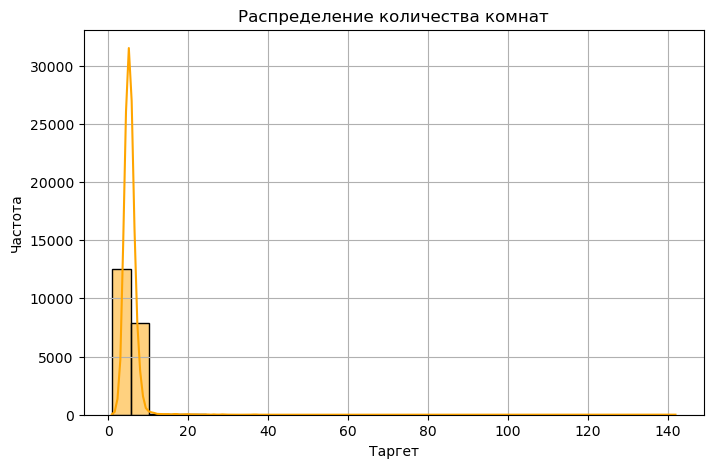

In [46]:
# Строим гистограмму
plt.figure(figsize=(8, 5))
sns.histplot(df['AveRooms'], bins=30, kde=True, color="orange")

# Оформляем график
plt.xlabel("Таргет")
plt.ylabel("Частота")
plt.title("Распределение количества комнат")

plt.grid(True)
plt.show()

In [48]:
df['AveRooms'].max()

141.9090909090909

In [51]:
# Создаём DataFrame с признаком 'AveRooms' и целевой переменной
df_corr = df[['AveRooms']].copy()
df_corr['Target'] = target

# Вычисляем границы 2.5% и 97.5% квантилей
lower_bound = np.percentile(df_corr['AveRooms'], 2.5)  # Нижний квантиль
upper_bound = np.percentile(df_corr['AveRooms'], 97.5)  # Верхний квантиль

# Фильтруем данные, убирая выбросы
df_filtered = df_corr[(df_corr['AveRooms'] >= lower_bound) & (df_corr['AveRooms'] <= upper_bound)]

# Пересчитываем корреляции
print("Корреляция Пирсона после удаления выбросов:")
print(df_filtered.corr(method="pearson")["Target"].sort_values(ascending=False))

print("\nКорреляция Спирмена после удаления выбросов:")
print(df_filtered.corr(method="spearman")["Target"].sort_values(ascending=False))

print("\nКорреляция Кендалла после удаления выбросов:")
print(df_filtered.corr(method="kendall")["Target"].sort_values(ascending=False))


Корреляция Пирсона после удаления выбросов:
Target      1.000000
AveRooms    0.327759
Name: Target, dtype: float64

Корреляция Спирмена после удаления выбросов:
Target      1.000000
AveRooms    0.274793
Name: Target, dtype: float64

Корреляция Кендалла после удаления выбросов:
Target      1.000000
AveRooms    0.186279
Name: Target, dtype: float64


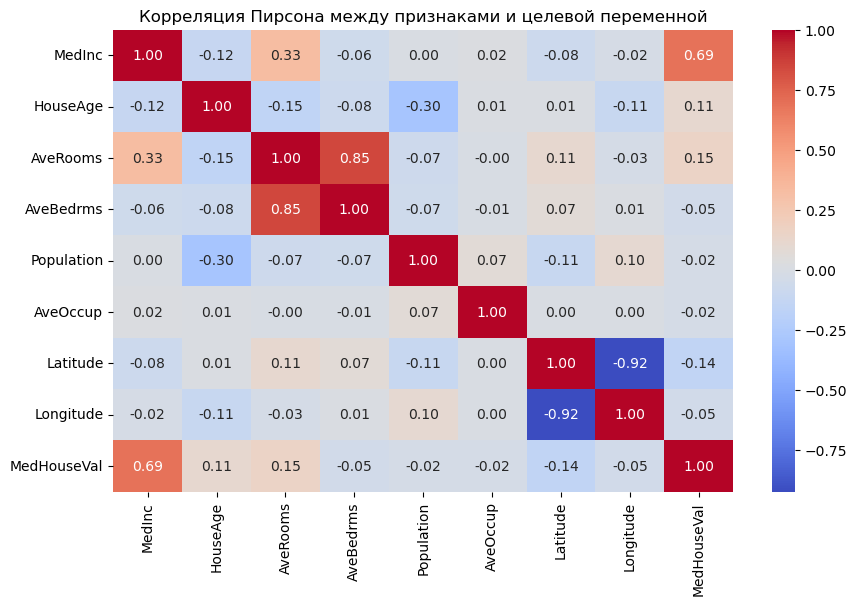

In [53]:
df_corr = df.copy()

corr_matrix = df_corr.corr(method="pearson")

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Корреляция Пирсона между признаками и целевой переменной")
plt.show()